In [1]:
from functions_py import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

# Michrochip images

In [3]:
path_fits='/share/storage2/connie/data/microchip/proc_bkgd_1x2/'

for path in glob.glob(path_fits+'/proc_*fits'): 
    print(path)

/share/storage2/connie/data/microchip/proc_bkgd_1x2/proc_skp_moduleC002_bkgd_clearVB300_NBINROW2_img56.fits
/share/storage2/connie/data/microchip/proc_bkgd_1x2/proc_skp_moduleC002_bkgd_clearVB300_NBINROW2_img57.fits
/share/storage2/connie/data/microchip/proc_bkgd_1x2/proc_skp_moduleC002_bkgd_clearVB300_NBINROW2_img58.fits
/share/storage2/connie/data/microchip/proc_bkgd_1x2/proc_skp_moduleC002_bkgd_clearVB300_NBINROW2_img59.fits
/share/storage2/connie/data/microchip/proc_bkgd_1x2/proc_skp_moduleC002_bkgd_clearVB300_NBINROW2_img60.fits
/share/storage2/connie/data/microchip/proc_bkgd_1x2/proc_skp_moduleC002_bkgd_clearVB300_NBINROW2_img61.fits
/share/storage2/connie/data/microchip/proc_bkgd_1x2/proc_skp_moduleC002_bkgd_clearVB300_NBINROW2_img62.fits
/share/storage2/connie/data/microchip/proc_bkgd_1x2/proc_skp_moduleC002_bkgd_clearVB300_NBINROW2_img63.fits
/share/storage2/connie/data/microchip/proc_bkgd_1x2/proc_skp_moduleC002_bkgd_clearVB300_NBINROW2_img64.fits
/share/storage2/connie/data/

## Raw Image

Filename: /share/storage2/connie/data/microchip/proc_bkgd_1x2/proc_skp_moduleC002_bkgd_clearVB300_NBINROW2_img75.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     160   (700, 325)   float32   
  1                1 ImageHDU       159   (700, 325)   float32   
  2                1 ImageHDU       159   (700, 325)   float32   
  3                1 ImageHDU       159   (700, 325)   float32   
None
----------------


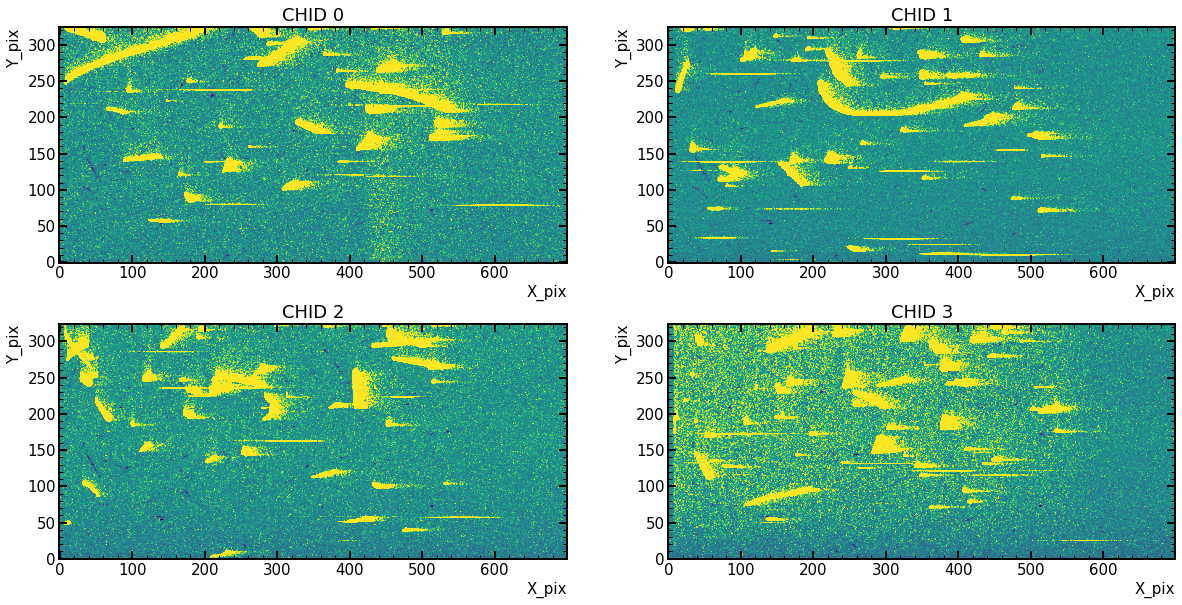

In [4]:
path='/share/storage2/connie/data/microchip/proc_bkgd_1x2/proc_skp_moduleC002_bkgd_clearVB300_NBINROW2_img75.fits'
hdu_list = fits.open(path)
print(hdu_list.info())
print('----------------')
# hdu_list[0].header
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(hdu_list[i].data-np.median(hdu_list[i].data),vmin=-800,vmax=800)
    plt.title('CHID '+str(i))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
plt.show()


#     try:
#         header = hdu_list[chid].header

#     except (IndexError,OSError):
#         print(f"Error - This file is corrupted, {path}")        
#         # returns at exception without writing
#         return

#     start=parse(hdu_list[chid].header["DATESTART"]+"Z").timestamp()
#     end=parse(hdu_list[chid].header["DATEEND"]+"Z").timestamp()
#     time=datetime.timedelta(seconds=end-start)
#     readout_time=time.total_seconds()/86400 #readout time in days
       
#     exposure_time=readout_time*int(hdu_list[chid].header["CCDNROW"])/(2*int(hdu_list[chid].header["NROW"]))

## Calibrated imges, medians subtracted, cleaned xtalk

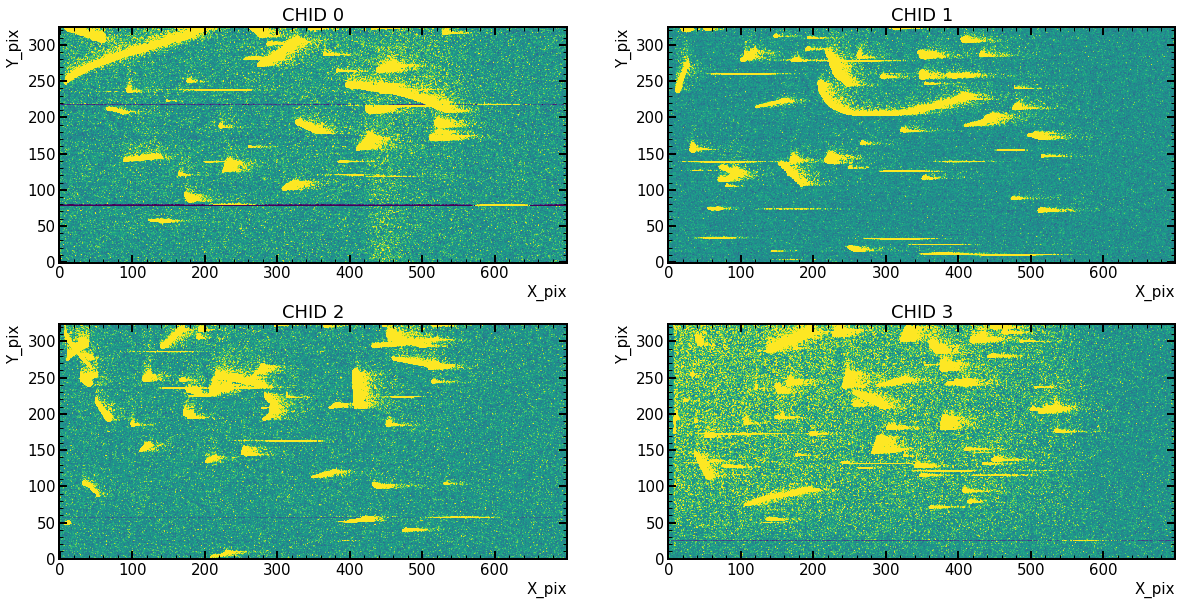

In [5]:
data_pre = precal(hdu_list,extentions=4)
_,_,data = LocalCalib(data_pre,extentions=4)
fig=plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(data[i],vmin=-1,vmax=1)
    plt.title('CHID '+str(i))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
# plt.savefig('IMAGES_POSCALIB.png', bbox_inches='tight', dpi=100)
plt.show()

## Readout Noise

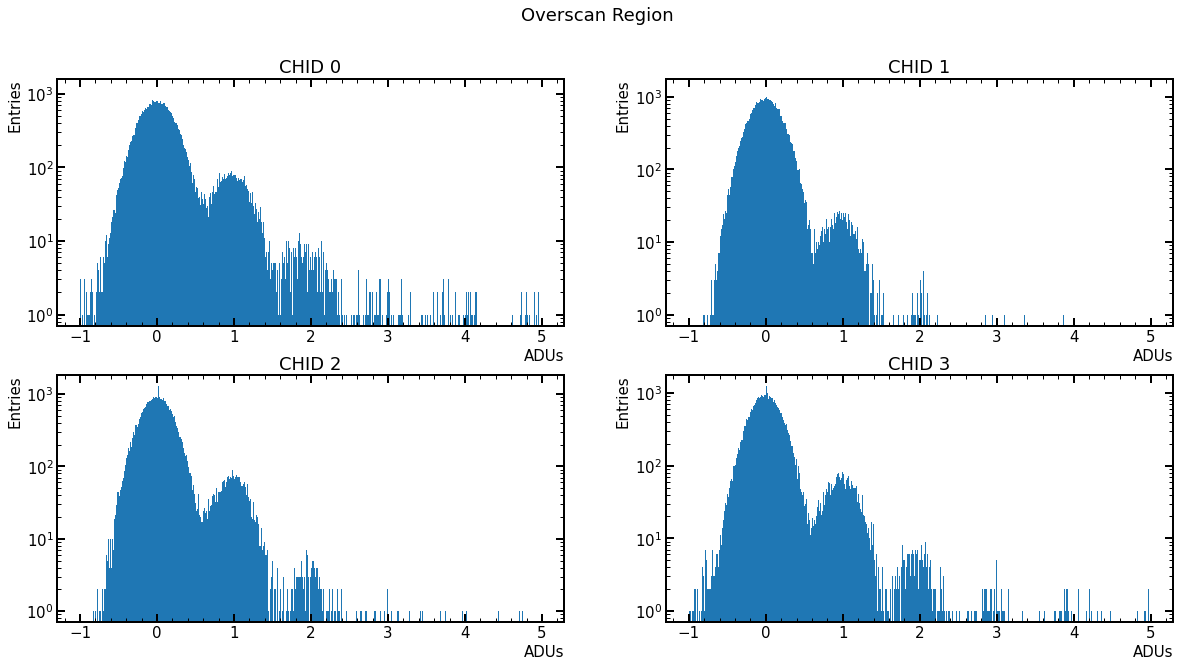

In [6]:
fig=plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    oscam_hist, bins = np.histogram( data[i][overscan_mask].flatten(), bins = np.arange(-1,5,0.01) )
    x = (bins[1:] + bins[:-1])/2
   
    plt.bar(x,oscam_hist,width=.01)
    plt.title('CHID '+str(i))
    plt.yscale('log')
    plt.ylabel('Entries')
    plt.xlabel('ADUs')
#     plt.legend()
plt.suptitle('Overscan Region')
plt.show()

Noise CHID 0: (0.212 +- 0.003) e-
Noise CHID 1: (0.195 +- 0.002) e-
Noise CHID 2: (0.192 +- 0.002) e-
Noise CHID 3: (0.188 +- 0.002) e-


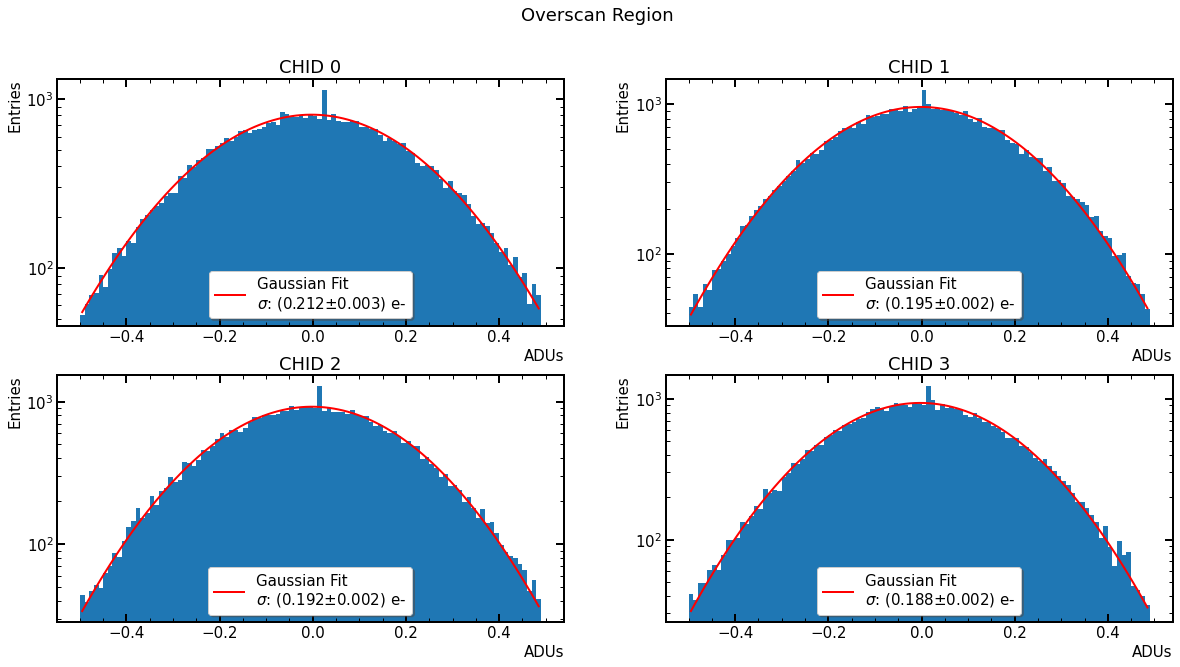

In [7]:
fig=plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    oscam_hist, bins = np.histogram( data[i][overscan_mask].flatten(), bins = np.arange(-.5,.5,0.01) )
    x = (bins[1:] + bins[:-1])/2
    try:
        popt, pcov = curve_fit( gauss, x, oscam_hist,
                               p0=[ 0,0.2, np.sum(oscam_hist)])
    except (RuntimeError,OptimizeWarning,RuntimeWarning):
        print("Error - readout noise fit failed")
        
    sigma = abs(popt[1]) 
    perr = np.sqrt(np.diag(pcov))
    sigma_err = perr[1]
    
    plt.bar(x,oscam_hist,width=.01)
    
    plt.plot(x,gauss(x,*popt),linewidth=2,c='red',
             label='Gaussian Fit'+'\n'+r'$\sigma$: ({:.3f}$\pm${:.3f}) e-'.format(sigma,sigma_err))
    print('Noise CHID '+str(i)+': ({:.3f} +- {:.3f}) e-'.format(sigma,sigma_err))
    plt.title('CHID '+str(i))
    plt.yscale('log')
    plt.ylabel('Entries')
    plt.xlabel('ADUs')
    plt.legend(shadow=True,loc='lower center')
plt.suptitle('Overscan Region')
# plt.savefig('NOISE_FIT.png', bbox_inches='tight', dpi=100)

plt.show()

# MASKING STUDY

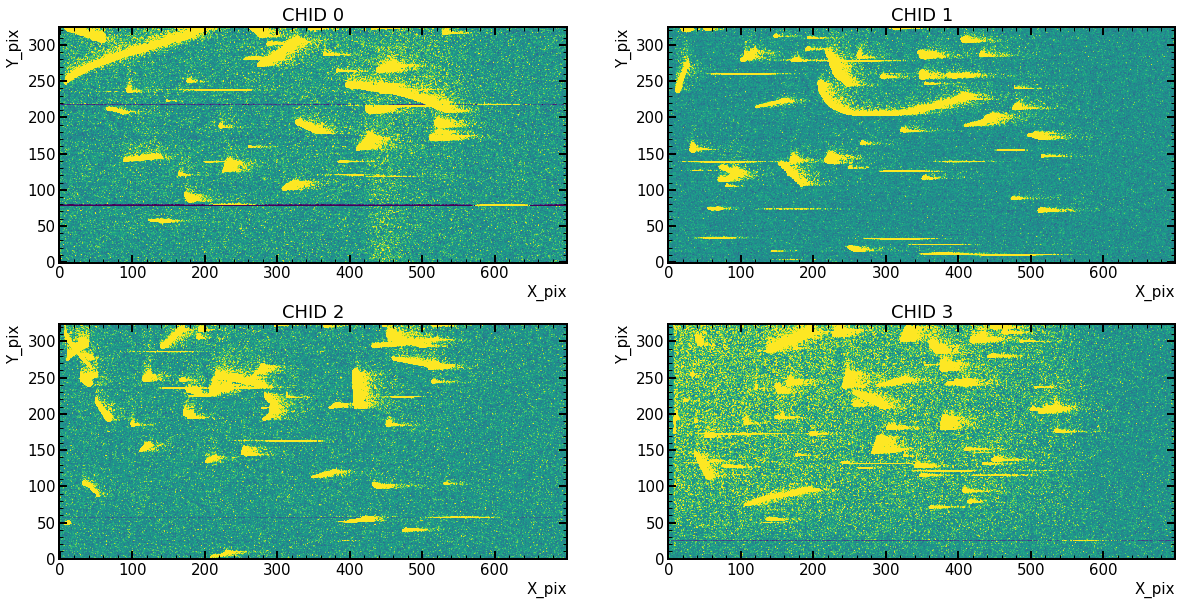

In [8]:
fig=plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(data[i],vmin=-1,vmax=1)
    plt.title('CHID '+str(i))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
plt.show()

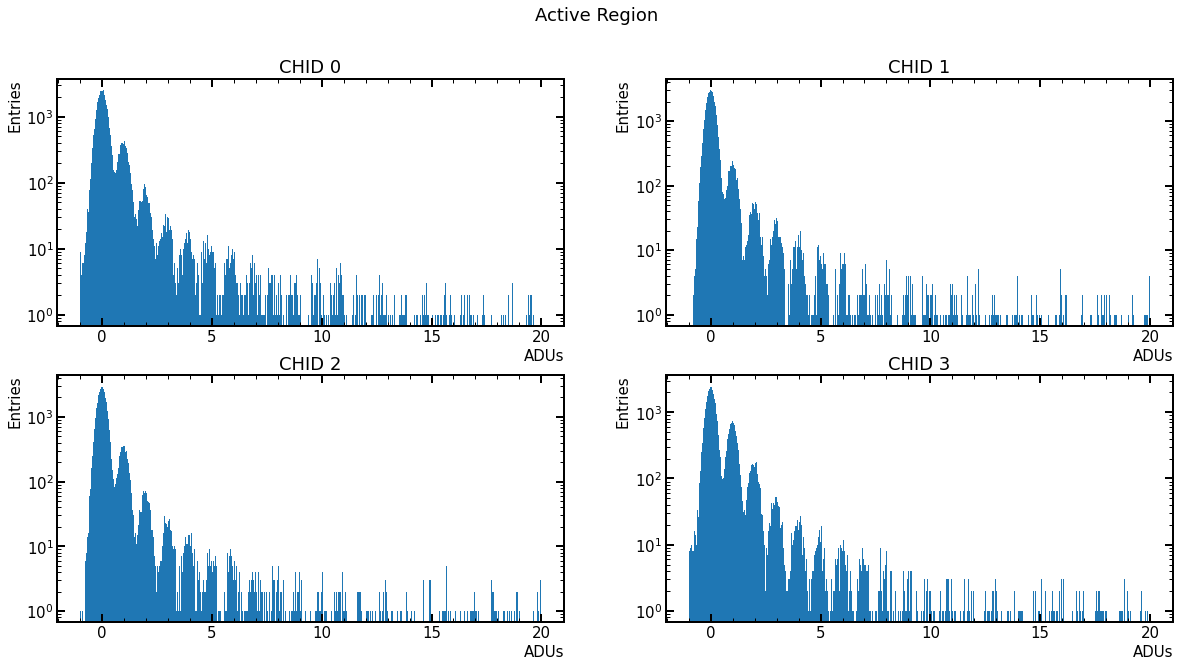

In [9]:
fig=plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    oscam_hist, bins = np.histogram( data[i][active_mask].flatten(), bins = np.arange(-1,20,0.01) )
    x = (bins[1:] + bins[:-1])/2
   
    plt.bar(x,oscam_hist,width=.01)
    plt.title('CHID '+str(i))
    plt.yscale('log')
    plt.ylabel('Entries')
    plt.xlabel('ADUs')
#     plt.legend()
plt.suptitle('Active Region')
plt.show()

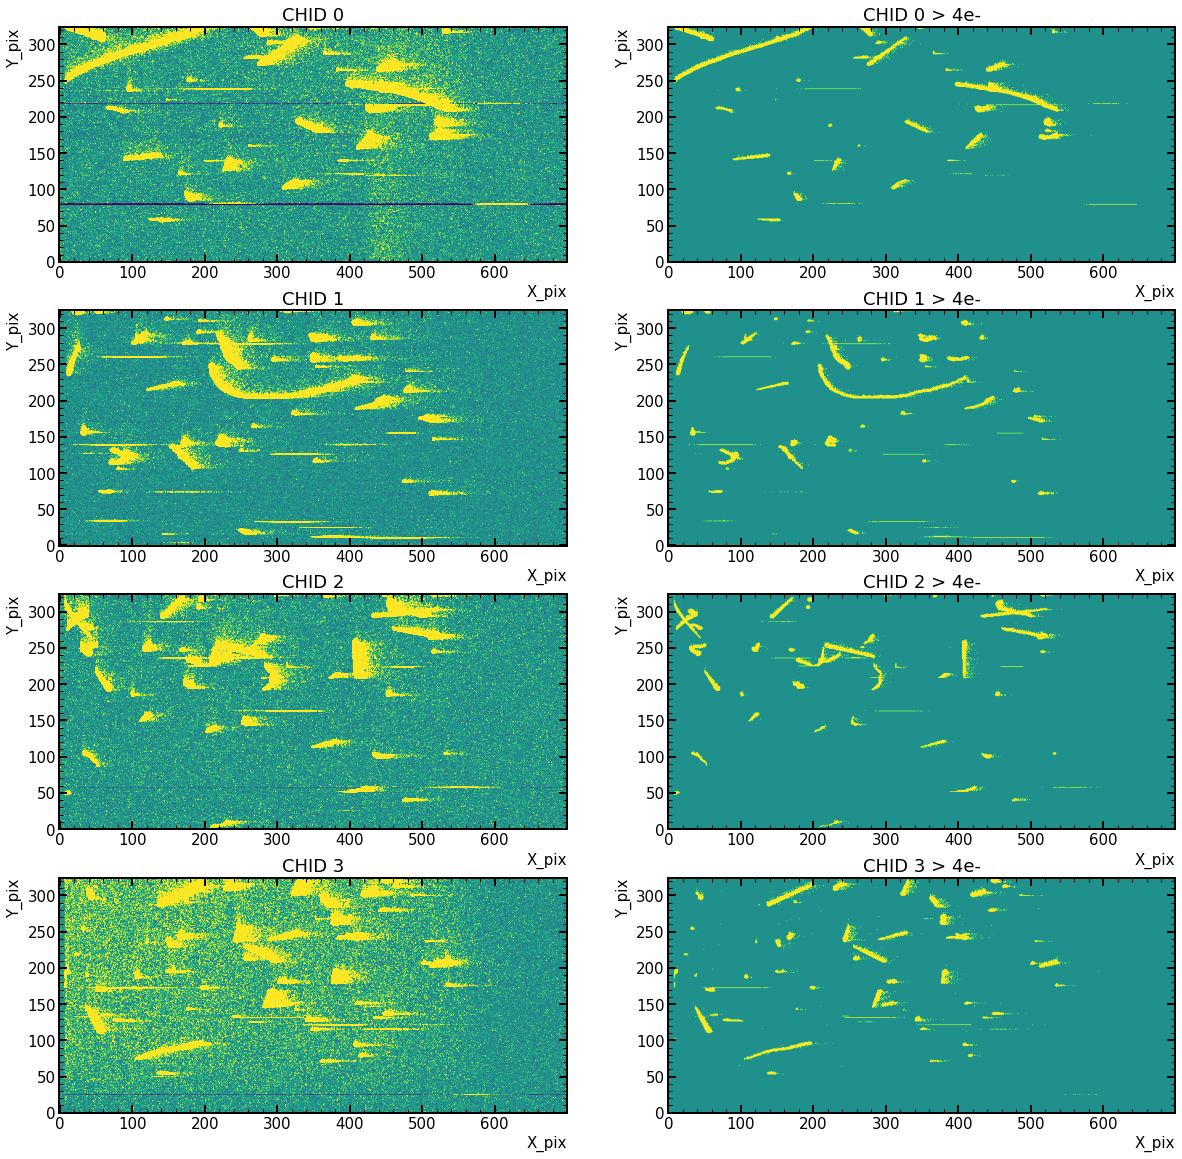

In [10]:
fig=plt.figure(figsize=(20,20))

for i in range(4):
    plt.subplot(4,2,2*(i+1)-1)
    plt.imshow(data[i],vmin=-1,vmax=1)
    plt.title('CHID '+str(i))
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
    plt.subplot(4,2,2*(i+1))
    plt.imshow(data[i]>4,vmin=-1,vmax=1)
    plt.title('CHID '+str(i)+' > 4e-')
    plt.ylabel('Y_pix')
    plt.xlabel('X_pix')
plt.show()

In [11]:
mask_L0=np.zeros(data.shape) #np.zero_like(data)
for i in range(4):mask_L0[i]=ndimage.label(data[i]>4,structure=[[1,1,1],[1,1,1],[1,1,1]])[0]

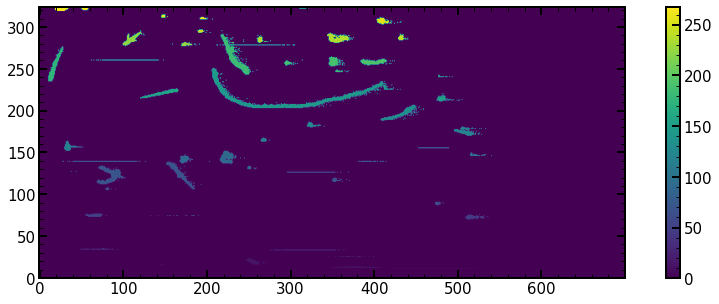

In [14]:
plt.figure(figsize=(15,5))
plt.imshow(mask_L0[1])
plt.colorbar()
plt.show()

In [15]:
import skimage.measure as sk

In [16]:
label=ndimage.label(data[1]>4,structure=[[1,1,1],[1,1,1],[1,1,1]])[0]

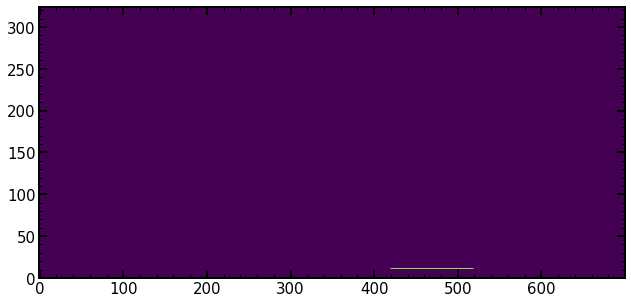

In [34]:
plt.figure(figsize=(15,5))
plt.imshow(label==6)
plt.show()

In [150]:
[x1,y1]=np.where(label==2)
[x1,y1]

[array([55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57,
        57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
        57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58,
        58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58,
        58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
        59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
        59, 59, 59, 59, 60]),
 array([142, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
        151, 152, 153, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
        152, 153, 154, 155, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 123, 124, 125, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
   

Getting only the High Energy Events

In [32]:
def sum_intensity(region, intensities):
    return np.sum(intensities[region])

rps=sk.regionprops(label,intensity_image=data[1],cache=False, extra_properties=[sum_intensity])
areas=[r.area for r in rps]
energy=[r.sum_intensity for r in rps]
centr=[r.centroid for r in rps]

dic_props={"areas":areas,"energias":energy,'centroid':centr}

In [33]:
df=pd.DataFrame.from_dict(dic_props)
df.index = np.arange(1, len(df)+1)
df.head(15)

areas      energias                                  centroid
1       3     58.683264                                (0.0, 4.0)
2       4     20.637969                           (11.75, 410.25)
3       1      5.968864                             (11.0, 414.0)
4       1      5.309836                             (11.0, 416.0)
5       1      5.176566                             (11.0, 418.0)
6      99  25725.889869                             (11.0, 469.0)
7       1      4.993991                             (11.0, 521.0)
8       1      4.315299                             (11.0, 524.0)
9       1      4.553982                             (11.0, 526.0)
10      1      4.263430                             (11.0, 528.0)
11      1      7.376801                             (12.0, 349.0)
12     82   2179.270578   (12.341463414634147, 378.7926829268293)
13      4   5924.195541                             (16.0, 144.5)
14      2     10.318201                             (16.0, 148.5)
15     71  66254.761163  (19.211267605633804, 254.92957746478874)

In [35]:
energias=dic_props["energias"]
energias

[58.683263610256546,
 20.63796927460855,
 5.968863567467272,
 5.309835822617123,
 5.176565829391987,
 25725.889869314306,
 4.993990558423257,
 4.315299177956636,
 4.553982494601466,
 4.2634299803980715,
 7.376801021208798,
 2179.270577846035,
 5924.195540572315,
 10.31820133292266,
 66254.76116342195,
 26.42327755324752,
 4.19750023595195,
 4.008171398691729,
 4.271246337705467,
 6.307826475250049,
 4.019020594332348,
 4.736539186718267,
 12.186812022937172,
 4.08025616975462,
 36.57881656382758,
 9.584041076202617,
 8.998809847555355,
 9.153598027527762,
 15.770108452857553,
 8.949784123121667,
 4.1157858078653256,
 4.005504097575376,
 6.9019225680154035,
 8.283391687353616,
 8.942261013322122,
 57.99938971217182,
 5910.398327503888,
 12.20005846773529,
 4.830345524627995,
 6.2726047892673735,
 6.006215658922594,
 9.941942247453062,
 50.82132694403095,
 304.06676267448034,
 4.15165032662498,
 13.658203046735444,
 4.026714518062073,
 69194.80875632516,
 75.18432421476439,
 10.259167951

In [36]:
hee_list=np.where(np.array(energias)>80)[0].tolist() #index od the dictionary of events ---> TRESHOLD OF 80 ELECTRONS TO BE HE
hee_list

[5,
 11,
 12,
 14,
 36,
 43,
 47,
 50,
 62,
 65,
 68,
 70,
 72,
 81,
 88,
 92,
 93,
 98,
 104,
 112,
 116,
 117,
 119,
 121,
 132,
 134,
 144,
 152,
 158,
 175,
 178,
 183,
 185,
 189,
 190,
 193,
 211,
 223,
 224,
 235,
 236,
 242,
 250,
 255,
 259,
 261,
 263,
 264,
 265]

In [37]:
label.shape

(325, 700)

Getting there positions

In [38]:
HE_events=np.zeros_like(label)
for event in hee_list:
    [x,y]=np.where(label==event+1)
    for i in range(len(x)):
        HE_events[x[i],y[i]]=1

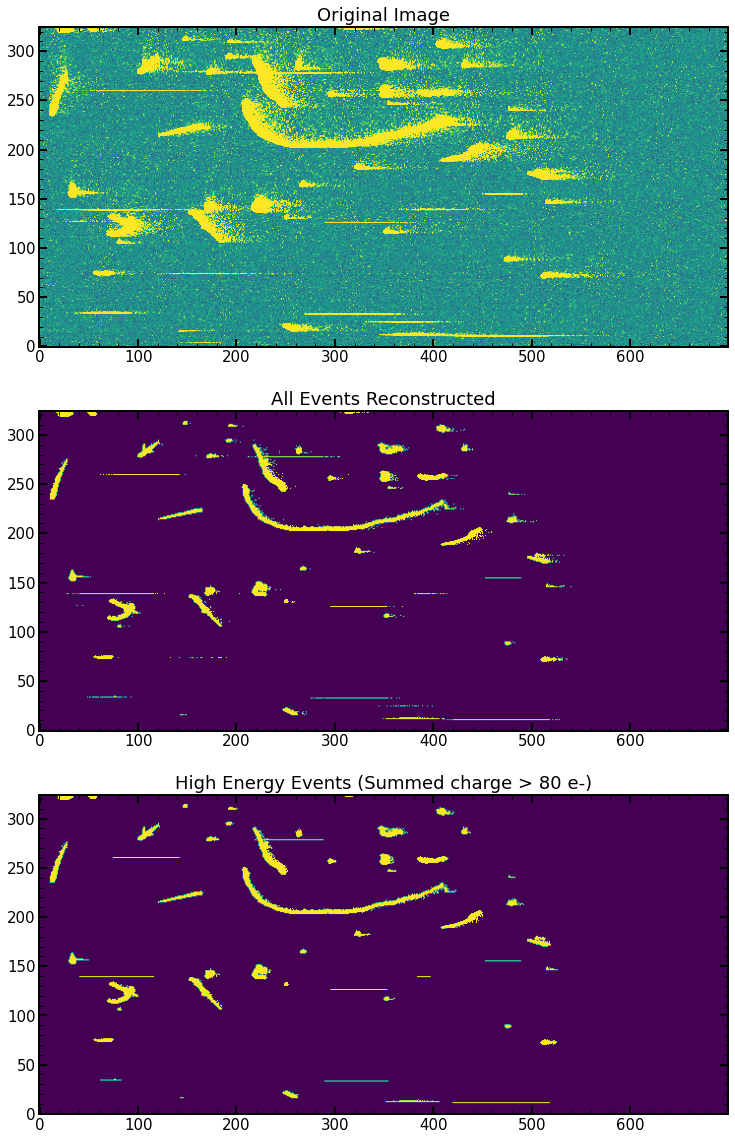

In [40]:
plt.figure(figsize=(30,20))
plt.subplot(313)
plt.imshow(HE_events)
plt.title('High Energy Events (Summed charge > 80 e-)')
# plt.colorbar()
plt.subplot(312)
plt.title('All Events Reconstructed')
plt.imshow(label!= 0)
plt.subplot(311)
plt.imshow(data[1],vmin=-1,vmax=1)
plt.title('Original Image')

plt.show()

In [41]:
mask_bleeding=ndimage.morphology.binary_dilation(HE_events>0,structure=[[0,0,0],[0,1,1],[0,0,0]],
                                             iterations=40)*1.0#-(HE_events>0)*1.0

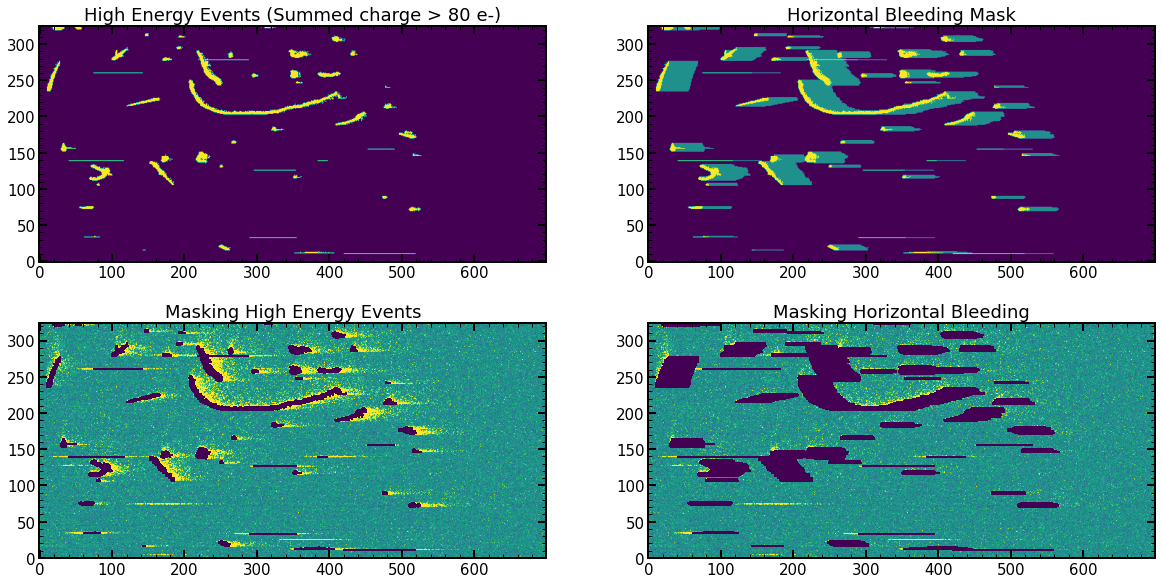

In [42]:
plt.figure(figsize=(20,10))
# plt.subplot(223)
# plt.imshow(data[0],vmin=-1,vmax=1)
# plt.title('Original Image')
plt.subplot(221)
plt.imshow(HE_events)
plt.title('High Energy Events (Summed charge > 80 e-)')
plt.subplot(222)
plt.imshow(mask_bleeding+(HE_events>0)*1)
plt.title('Horizontal Bleeding Mask')
plt.subplot(223)
plt.imshow(data[1]+((HE_events>0))*-1e7,vmin=-1,vmax=1)
# plt.colorbar()
plt.title('Masking High Energy Events')
plt.subplot(224)
plt.imshow(data[1]+((mask_bleeding+HE_events>0))*-1e7,vmin=-1,vmax=1)
plt.title('Masking Horizontal Bleeding')
plt.show()

In [43]:
maskV_bleeding=ndimage.morphology.binary_dilation(HE_events>0,structure=[[0,0,0],[0,1,0],[0,1,0]],
                                             iterations=20)*1.0#-(HE_events>0)*1.0

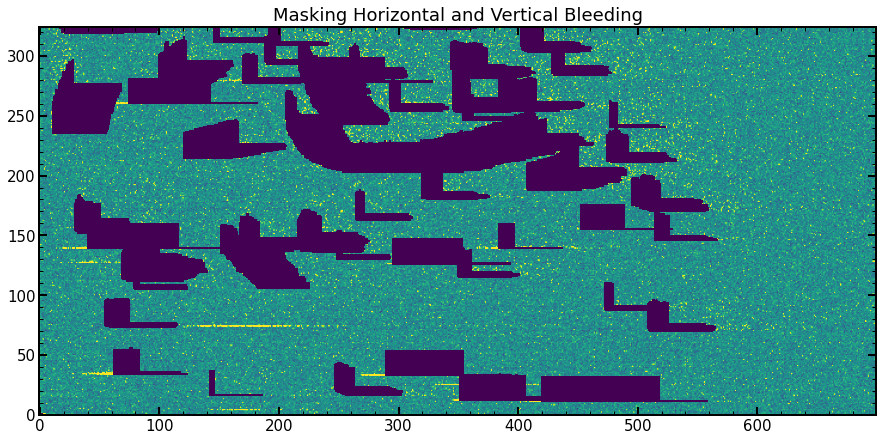

In [44]:
plt.figure(figsize=(15,10))
plt.imshow(data[1]+((maskV_bleeding+mask_bleeding+HE_events>0))*-1e7,vmin=-1,vmax=1)
plt.title('Masking Horizontal and Vertical Bleeding')
plt.show()

In [45]:
labelSRE=ndimage.label(data[1]>1.5,structure=[[0,0,0],[1,1,1],[0,0,0]])[0]

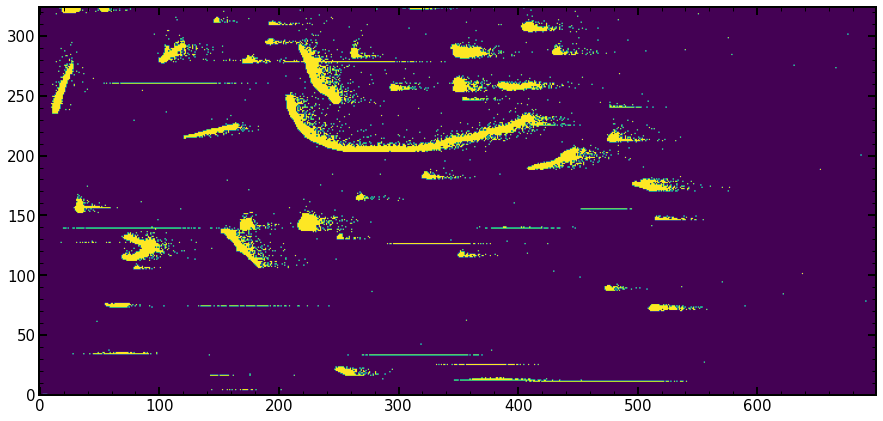

In [46]:
plt.figure(figsize=(15,10))
plt.imshow(labelSRE!=0)

In [150]:
rps=sk.regionprops(labelSRE,intensity_image=data[1],cache=False)
areas=[r.area for r in rps]
centr=[r.centroid for r in rps]

dic_propsSRE={"areas":areas,'centroid':centr}
LONG_events=np.zeros_like(labelSRE)
for event in np.where(np.array(dic_propsSRE['areas'])>1)[0].tolist():
    [x,y]=np.where(labelSRE==event+1)
    for i in range(len(x)):
        LONG_events[x[i],y[i]]=1

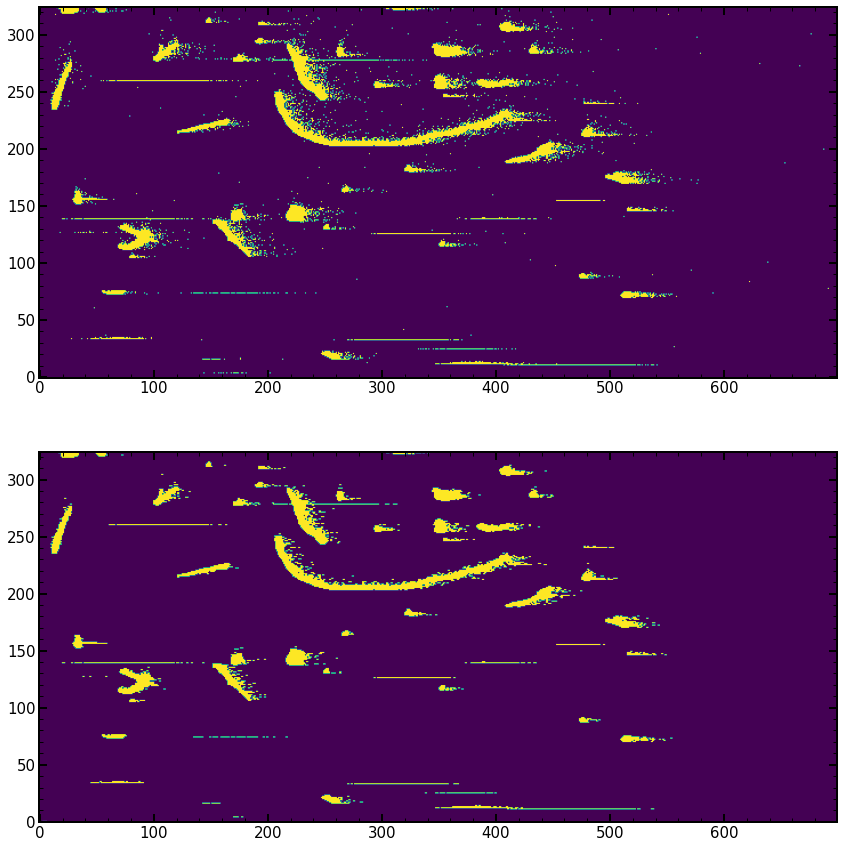

In [151]:
plt.figure(figsize=(25,15))
plt.subplot(211)
plt.imshow(labelSRE!=0)
plt.subplot(212)
plt.imshow(LONG_events)

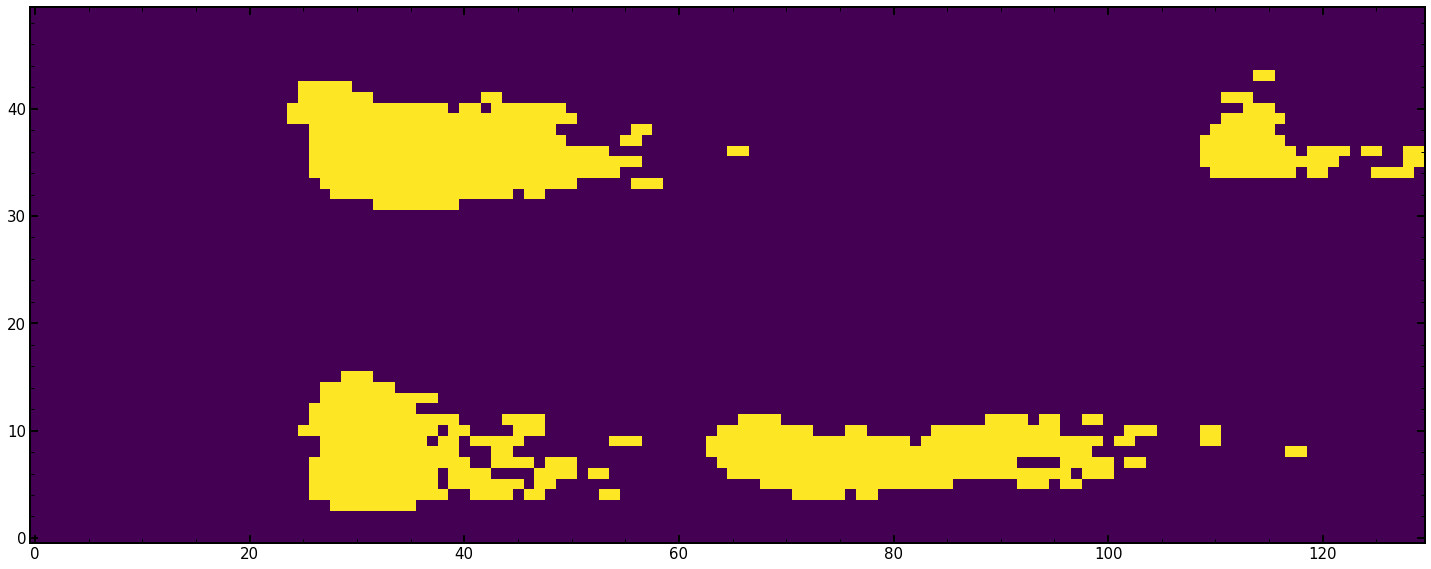

In [153]:
plt.figure(figsize=(25,15))
plt.imshow(LONG_events[250:300,320:450])

TREM AGORA

SRE SCRIPT UP TO NOW:


    1. ndimage.label, structure ---
    2. 